In [1]:
import pandas as pd
from pmdarima.arima import auto_arima, ADFTest
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle('../data/df6.pkl')
data.head(5)


,ID,DELTA,YEAR_DAY,DATE,MEAN_CONSUMPTION,VARIANCE_CONSUMPTION,WEEKDAY,IS_WEEKEND,sin_WEEKDAY,cos_WEEKDAY,sin_year_day,cos_year_day,PRECIPITATIONS,MIN_TEMP,MEAN_TEMP,MAX_TEMP,SUN,IS_GOOD
0,0,243.0,0,2019-02-01,282.893151,11453.639651,4,0,-0.433884,-0.900969,0.000000,1.000000,0.0,16.5,17.6,18.7,7.1,1
1,0,236.0,1,2019-02-02,282.893151,11453.639651,5,1,-0.974928,-0.222521,0.017213,0.999852,0.0,9.8,13.4,17.1,6.1,1
2,0,335.0,2,2019-02-03,282.893151,11453.639651,6,1,-0.781831,0.623490,0.034422,0.999407,0.0,7.7,10.6,13.6,9.3,1
3,0,252.0,3,2019-02-04,282.893151,11453.639651,0,0,0.000000,1.000000,0.051620,0.998667,0.0,4.1,10.6,17.2,9.3,1
4,0,220.0,4,2019-02-05,282.893151,11453.639651,1,0,0.781831,0.623490,0.068802,0.997630,0.0,7.5,14.6,21.6,9.2,1


In [3]:
data_st = data[data['ID'] == 4]

In [4]:
data_st.head(400)

,ID,DELTA,YEAR_DAY,DATE,MEAN_CONSUMPTION,VARIANCE_CONSUMPTION,WEEKDAY,IS_WEEKEND,sin_WEEKDAY,cos_WEEKDAY,sin_year_day,cos_year_day,PRECIPITATIONS,MIN_TEMP,MEAN_TEMP,MAX_TEMP,SUN,IS_GOOD
1460,4,247.56,0,2019-02-01,265.456329,6416.593867,4,0,-0.433884,-0.900969,0.000000,1.000000,0.0,16.5,17.6,18.7,7.1,1
1461,4,235.67,1,2019-02-02,265.456329,6416.593867,5,1,-0.974928,-0.222521,0.017213,0.999852,0.0,9.8,13.4,17.1,6.1,1
1462,4,254.33,2,2019-02-03,265.456329,6416.593867,6,1,-0.781831,0.623490,0.034422,0.999407,0.0,7.7,10.6,13.6,9.3,1
1463,4,412.00,3,2019-02-04,265.456329,6416.593867,0,0,0.000000,1.000000,0.051620,0.998667,0.0,4.1,10.6,17.2,9.3,1
1464,4,269.00,4,2019-02-05,265.456329,6416.593867,1,0,0.781831,0.623490,0.068802,0.997630,0.0,7.5,14.6,21.6,9.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,4,263.06,360,2020-01-27,265.456329,6416.593867,0,0,0.000000,1.000000,-0.085965,0.996298,0.0,7.6,13.0,18.4,7.6,1
1821,4,303.94,361,2020-01-28,265.456329,6416.593867,1,0,0.781831,0.623490,-0.068802,0.997630,0.0,13.8,15.8,17.9,0.4,1
1822,4,421.00,362,2020-01-29,265.456329,6416.593867,2,0,0.974928,-0.222521,-0.051620,0.998667,0.0,14.7,18.6,22.4,2.4,1
1823,4,420.00,363,2020-01-30,265.456329,6416.593867,3,0,0.433884,-0.900969,-0.034422,0.999407,0.0,13.0,17.6,22.2,5.3,1


In [5]:
list(data_st.columns)

['ID',
 'DELTA',
 'YEAR_DAY',
 'DATE',
 'MEAN_CONSUMPTION',
 'VARIANCE_CONSUMPTION',
 'WEEKDAY',
 'IS_WEEKEND',
 'sin_WEEKDAY',
 'cos_WEEKDAY',
 'sin_year_day',
 'cos_year_day',
 'PRECIPITATIONS',
 'MIN_TEMP',
 'MEAN_TEMP',
 'MAX_TEMP',
 'SUN',
 'IS_GOOD']

In [6]:
data_st = data_st.drop(['ID',
 'YEAR_DAY',
 'MEAN_CONSUMPTION',
 'VARIANCE_CONSUMPTION',
 'WEEKDAY',
 'IS_WEEKEND',
 'sin_WEEKDAY',
 'cos_WEEKDAY',
 'sin_year_day',
 'cos_year_day',
 'PRECIPITATIONS',
 'MIN_TEMP',
 'MEAN_TEMP',
 'MAX_TEMP',
 'SUN',
 'IS_GOOD'], axis=1)

In [7]:
data_st.head(5)

,DELTA,DATE
1460,247.56,2019-02-01
1461,235.67,2019-02-02
1462,254.33,2019-02-03
1463,412.00,2019-02-04
1464,269.00,2019-02-05


In [8]:
data_st.set_index('DATE', inplace = True)

<AxesSubplot:xlabel='DATE'>

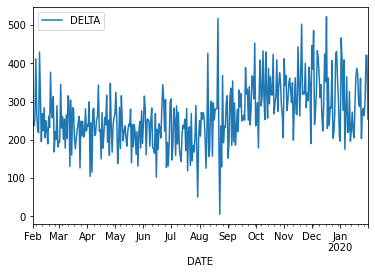

In [9]:
data_st.plot()

In [10]:
len(data_st)

365

In [11]:
#Stationarity is an important concept in time-series and any time-series 
# data should undergo a stationarity test before proceeding with a model.
#We use the ‘Augmented Dickey-Fuller Test’ to check whether the data is 
# stationary or not which is available in the ‘pmdarima’ package.

augmented_dickey_fuller_test = ADFTest(alpha = 0.05)
augmented_dickey_fuller_test.should_diff(data_st)

#From the above, we can conclude that the data is non-stationary. Hence, 
# we would need to use the “Integrated (I)” concept, denoted by value ‘d’ 
# in time series to make the data stationary while building the Auto ARIMA model.

(0.01, False)

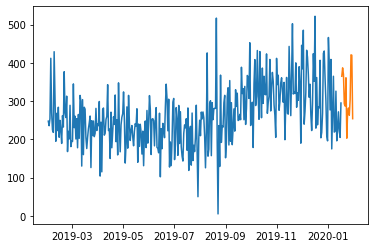

In [12]:
train = data_st[:(365-14)]
test = data_st[-14:]
plt.plot(train)
plt.plot(test)
#plot train test

ARIMA

Auto-Regressive (p) -> Number of autoregressive terms.

Integrated (d) -> Number of nonseasonal differences needed for stationarity.

Moving Average (q) -> Number of lagged forecast errors in the prediction equation.

In [13]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True, random_state=2517, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4279.687, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4073.336, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4174.719, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4052.249, Time=0.50 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=4042.533, Time=1.00 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=4027.609, Time=1.77 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=4018.726, Time=6.63 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=32.49 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=10.83 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=4120.055, Time=5.51 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=3986.699, Time=8.25 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=3994.829, Time=2.32 sec
 ARIMA(2,1,0)(5,1,1)[12]             : AIC=inf, Time=40.40 sec
 ARIMA(2,1,0)(4,1,1)[12]            

In [14]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  351
Model:             SARIMAX(1, 1, 2)x(5, 1, [], 12)   Log Likelihood               -1932.001
Date:                             Mon, 04 Apr 2022   AIC                           3882.002
Time:                                     18:03:39   BIC                           3916.410
Sample:                                          0   HQIC                          3895.715
                                             - 351                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7462      0.112      6.681      0.000       0.527       0.965
ma.L1         -1.7991      0.090    -19.974      0.000      -1.976      -1.623
ma.L2          0.8242      0.083      9.904      0.000       0.661       0.987
ar.S.L12      -0.8338      0.056    -14.910      0.000      -0.943      -0.724
ar.S.L24      -0.6577      0.073     -9.068      0.000      -0.800      -0.516
ar.S.L36      -0.5472      0.083     -6.616      0.000      -0.709      -0.385
ar.S.L48      -0.4097      0.086     -4.751      0.000      -0.579      -0.241
ar.S.L60      -0.1992      0.061     -3.244      0.001      -0.320      -0.079
sigma2      5158.3921    419.284     12.303      0.000    4336.611    5980.174
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.32
Prob(Q):                              0.75   Prob(JB):                         0.52
Heteroskedasticity (H):               1.91   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting Test Data

In [15]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 14), index = test.index)
prediction.columns = ['predicted_delta']
prediction

,predicted_delta
DATE,
2020-01-18,259.990259
2020-01-19,296.705179
2020-01-20,319.610914
2020-01-21,262.417150
2020-01-22,240.013057
2020-01-23,254.701876
2020-01-24,234.881166
2020-01-25,209.771708
2020-01-26,258.232529


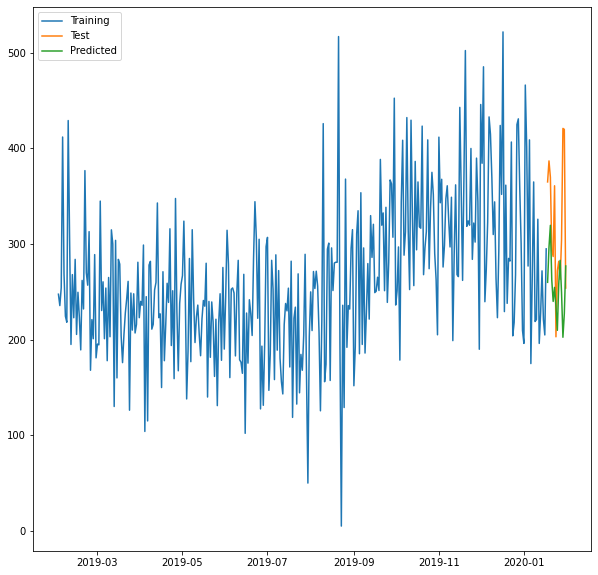

In [18]:
plt.figure(figsize = (10,10))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predicted')
plt.legend(loc = 'upper left')
plt.show()

In [20]:
mean_squared_error(test['DELTA'], prediction['predicted_delta'])

9316.850910135965

In [21]:
r2_score(test['DELTA'], prediction['predicted_delta'])

-1.2486313570319227

R2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2 is negative. Note that R2 is not always the square of anything, so it can have a negative value without violating any rules of math. R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

In [ ]:
test.head(14)